In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [8]:
# WRMSE 함수 정의
def WRMSE(predictions, answers):
    sum_answer = answers.sum().item()  # DataFrame에서 직접 합 계산
    if sum_answer == 0:
        return torch.sqrt(torch.tensor(0.001, dtype=torch.float))
    weights = answers / sum_answer  # 각 값에 대해 가중치 계산
    loss = (weights * (predictions - answers).pow(2)).sum().item()  # 가중치 적용한 오차 제곱합
    return torch.sqrt(torch.tensor(loss, dtype=torch.float))

# Answer Data

In [9]:
answer = pd.read_csv('./test_set/test_Y_data.csv')
answer.index = answer.iloc[:,0]
answer = answer.drop(columns=['datetime'])
print(answer.shape)
#print(answer)

answer_tensor = torch.tensor(answer['Kp'].values, dtype=torch.float32)

(2920, 1)


# Iterative sample

(2920, 1)
Test RMSE: 0.8023936792113683
Test WRMSE: 0.7456822395324707
Test R²: 0.508868565441009
Test MAE: 0.5616438356164384


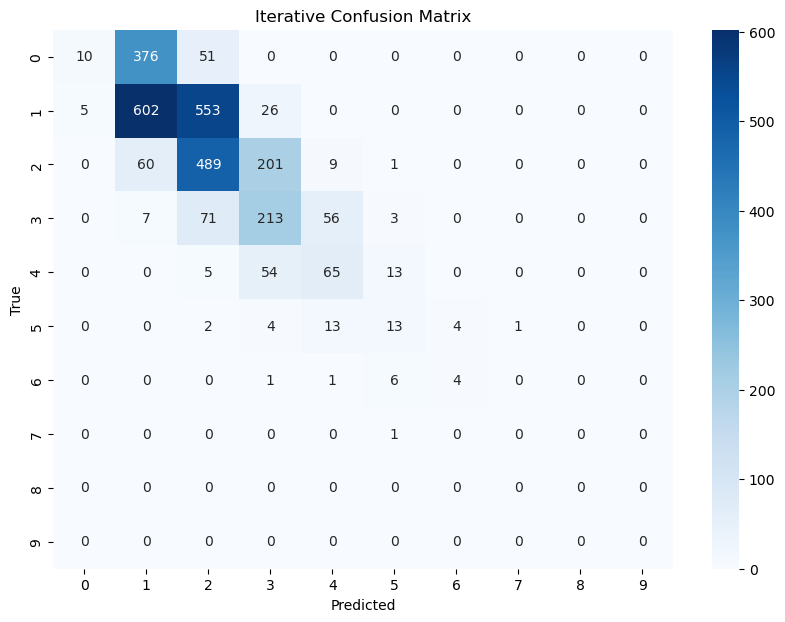

In [10]:
# Load Prediction
MLP_iterative = pd.read_csv('./MLP_Prediction/MLP_iterative.csv')
MLP_iterative.index = MLP_iterative.iloc[:,0]
MLP_iterative = MLP_iterative.drop(columns=['datetime'])
print(MLP_iterative.shape)

# RMSE
iterative_rmse = np.sqrt(mean_squared_error(answer, MLP_iterative))
print(f'Test RMSE: {iterative_rmse}')

# WRMSE
pred_tensor = torch.tensor(MLP_iterative['Prediction'].values, dtype=torch.float32)
iterative_wrmse = float(WRMSE(pred_tensor, answer_tensor))
print(f'Test WRMSE: {iterative_wrmse}')

# R²
iterative_r2 = r2_score(answer, MLP_iterative)
print(f'Test R²: {iterative_r2}')

# MAE
iterative_mae = mean_absolute_error(answer, MLP_iterative)
print(f'Test MAE: {iterative_mae}')

# Confusion Matrix
iterative_conf_matrix = confusion_matrix(answer, MLP_iterative, labels=np.arange(10))
plt.figure(figsize=(10, 7))
sns.heatmap(iterative_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Iterative Confusion Matrix')
plt.show()

# KNN sample

(2920, 1)
Test RMSE: 0.7728261602537809
Test WRMSE: 0.7365252375602722
Test R²: 0.5443972224091063
Test MAE: 0.5308219178082192


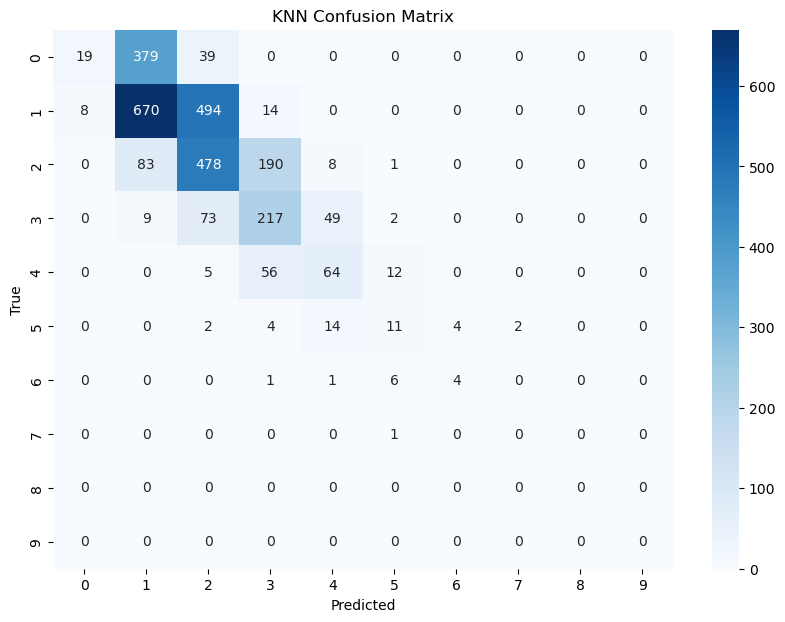

In [11]:
# Load Prediction
MLP_KNN = pd.read_csv('./MLP_Prediction/MLP_KNN.csv')
MLP_KNN.index = MLP_KNN.iloc[:,0]
MLP_KNN = MLP_KNN.drop(columns=['datetime'])
print(MLP_KNN.shape)

# RMSE
KNN_rmse = np.sqrt(mean_squared_error(answer, MLP_KNN))
print(f'Test RMSE: {KNN_rmse}')

# WRMSE
pred_tensor = torch.tensor(MLP_KNN['Prediction'].values, dtype=torch.float32)
KNN_wrmse = float(WRMSE(pred_tensor, answer_tensor))
print(f'Test WRMSE: {KNN_wrmse}')

# R²
KNN_r2 = r2_score(answer, MLP_KNN)
print(f'Test R²: {KNN_r2}')

# MAE
KNN_mae = mean_absolute_error(answer, MLP_KNN)
print(f'Test MAE: {KNN_mae}')

# Confusion Matrix
KNN_conf_matrix = confusion_matrix(answer, MLP_KNN, labels=np.arange(10))
plt.figure(figsize=(10, 7))
sns.heatmap(KNN_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

# Linear sample

(2920, 1)
Test RMSE: 0.7827331811522444
Test WRMSE: 0.7363765239715576
Test R²: 0.5326414167946624
Test MAE: 0.5428082191780822


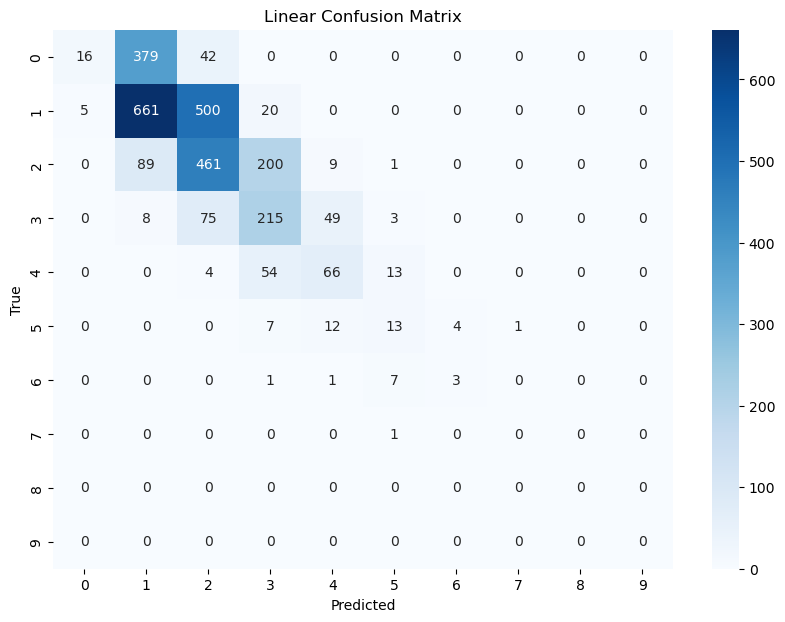

In [12]:
# Load Prediction
MLP_linear = pd.read_csv('./MLP_Prediction/MLP_linear.csv')
MLP_linear.index = MLP_linear.iloc[:,0]
MLP_linear = MLP_linear.drop(columns=['datetime'])
print(MLP_linear.shape)

# RMSE
linear_rmse = np.sqrt(mean_squared_error(answer, MLP_linear))
print(f'Test RMSE: {linear_rmse}')

# WRMSE
pred_tensor = torch.tensor(MLP_linear['Prediction'].values, dtype=torch.float32)
linear_wrmse = float(WRMSE(pred_tensor, answer_tensor))
print(f'Test WRMSE: {linear_wrmse}')

# R²
linear_r2 = r2_score(answer, MLP_linear)
print(f'Test R²: {linear_r2}')

# MAE
linear_mae = mean_absolute_error(answer, MLP_linear)
print(f'Test MAE: {linear_mae}')

# Confusion Matrix
linear_conf_matrix = confusion_matrix(answer, MLP_linear, labels=np.arange(10))
plt.figure(figsize=(10, 7))
sns.heatmap(linear_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Linear Confusion Matrix')
plt.show()

# Mean sample

(2920, 1)
Test RMSE: 0.7989719421754193
Test WRMSE: 0.7458290457725525
Test R²: 0.5130484074372559
Test MAE: 0.5589041095890411


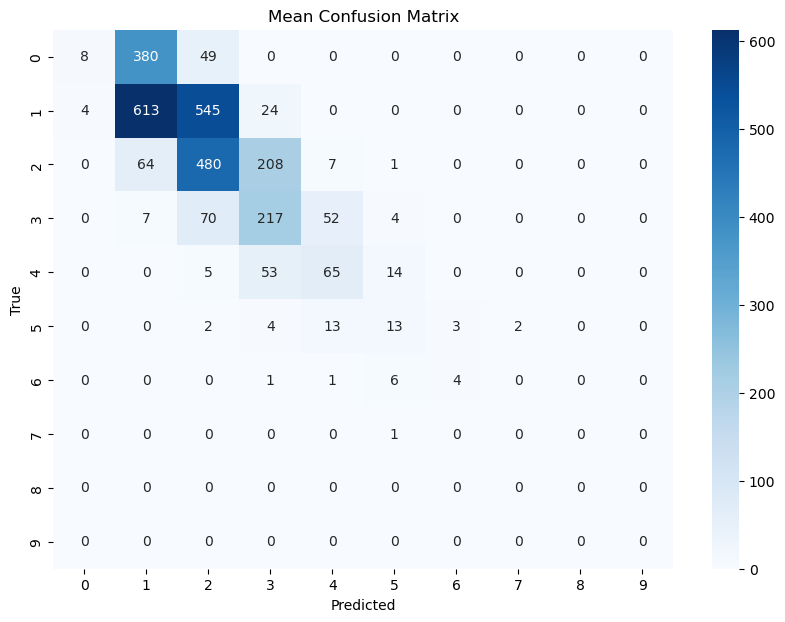

In [13]:
# Load Prediction
MLP_mean = pd.read_csv('./MLP_Prediction/MLP_mean.csv')
MLP_mean.index = MLP_mean.iloc[:,0]
MLP_mean = MLP_mean.drop(columns=['datetime'])
print(MLP_mean.shape)

# RMSE
mean_rmse = np.sqrt(mean_squared_error(answer, MLP_mean))
print(f'Test RMSE: {mean_rmse}')

# WRMSE
pred_tensor = torch.tensor(MLP_mean['Prediction'].values, dtype=torch.float32)
mean_wrmse = float(WRMSE(pred_tensor, answer_tensor))
print(f'Test WRMSE: {mean_wrmse}')

# R²
mean_r2 = r2_score(answer, MLP_mean)
print(f'Test R²: {mean_r2}')

# MAE
mean_mae = mean_absolute_error(answer, MLP_mean)
print(f'Test MAE: {mean_mae}')

# Confusion Matrix
mean_conf_matrix = confusion_matrix(answer, MLP_mean, labels=np.arange(10))
plt.figure(figsize=(10, 7))
sns.heatmap(mean_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Mean Confusion Matrix')
plt.show()

# Most frequent sample

(2920, 1)
Test RMSE: 0.7659267821511652
Test WRMSE: 0.7319037318229675
Test R²: 0.5524956662768343
Test MAE: 0.5215753424657534


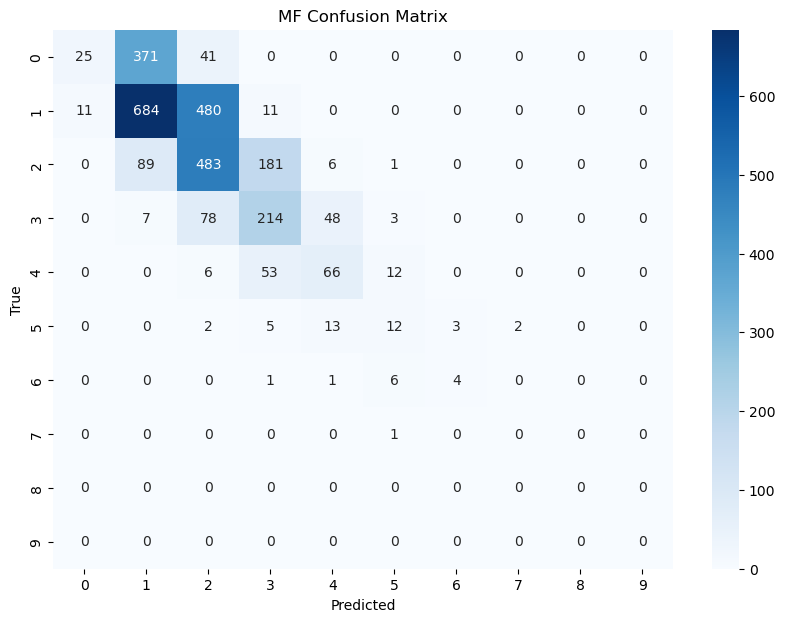

In [14]:
# Load Prediction
MLP_MF = pd.read_csv('./MLP_Prediction/MLP_MF.csv')
MLP_MF.index = MLP_MF.iloc[:,0]
MLP_MF = MLP_MF.drop(columns=['datetime'])
print(MLP_MF.shape)

# RMSE
MF_rmse = np.sqrt(mean_squared_error(answer, MLP_MF))
print(f'Test RMSE: {MF_rmse}')

# WRMSE
pred_tensor = torch.tensor(MLP_MF['Prediction'].values, dtype=torch.float32)
MF_wrmse = float(WRMSE(pred_tensor, answer_tensor))
print(f'Test WRMSE: {MF_wrmse}')

# R²
MF_r2 = r2_score(answer, MLP_MF)
print(f'Test R²: {MF_r2}')

# MAE
MF_mae = mean_absolute_error(answer, MLP_MF)
print(f'Test MAE: {MF_mae}')

# Confusion Matrix
MF_conf_matrix = confusion_matrix(answer, MLP_MF, labels=np.arange(10))
plt.figure(figsize=(10, 7))
sns.heatmap(MF_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MF Confusion Matrix')
plt.show()

# Random with distribution sample

(2920, 1)
Test RMSE: 0.7825143878059289
Test WRMSE: 0.736079216003418
Test R²: 0.5329026569194277
Test MAE: 0.5431506849315069


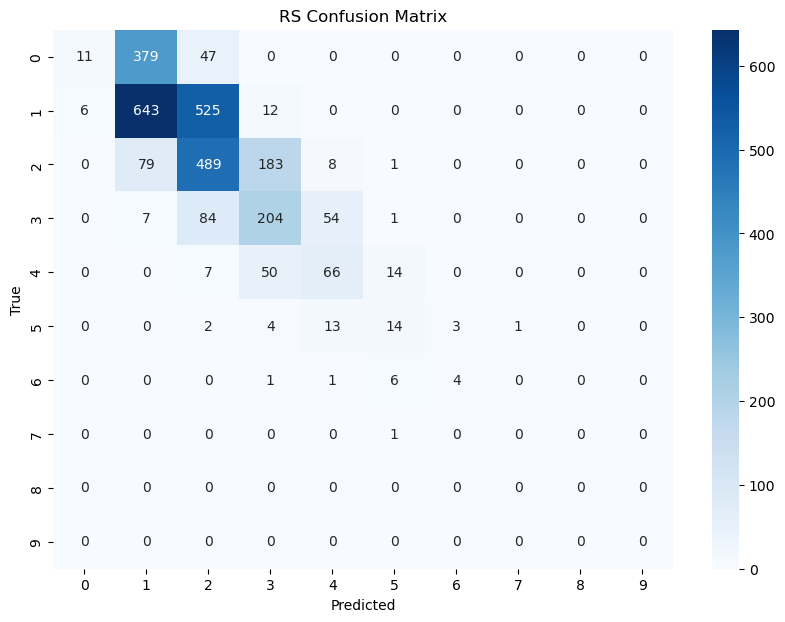

In [15]:
# Load Prediction
MLP_RS = pd.read_csv('./MLP_Prediction/MLP_RS.csv')
MLP_RS.index = MLP_RS.iloc[:,0]
MLP_RS = MLP_RS.drop(columns=['datetime'])
print(MLP_RS.shape)

# RMSE
RS_rmse = np.sqrt(mean_squared_error(answer, MLP_RS))
print(f'Test RMSE: {RS_rmse}')

# WRMSE
pred_tensor = torch.tensor(MLP_RS['Prediction'].values, dtype=torch.float32)
RS_wrmse = float(WRMSE(pred_tensor, answer_tensor))
print(f'Test WRMSE: {RS_wrmse}')

# R²
RS_r2 = r2_score(answer, MLP_RS)
print(f'Test R²: {RS_r2}')

# MAE
RS_mae = mean_absolute_error(answer, MLP_RS)
print(f'Test MAE: {RS_mae}')

# Confusion Matrix
RS_conf_matrix = confusion_matrix(answer, MLP_RS, labels=np.arange(10))
plt.figure(figsize=(10, 7))
sns.heatmap(RS_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RS Confusion Matrix')
plt.show()

# Median sample

(2920, 1)
Test RMSE: 0.7831705844728604
Test WRMSE: 0.7387509942054749
Test R²: 0.5321189365451315
Test MAE: 0.5448630136986301


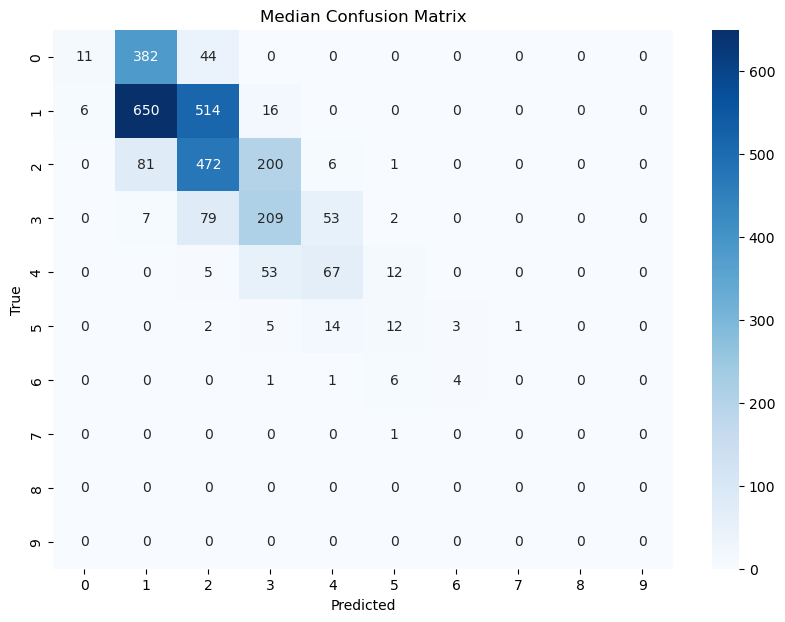

In [16]:
# Load Prediction
MLP_median = pd.read_csv('./MLP_Prediction/MLP_median.csv')
MLP_median.index = MLP_median.iloc[:,0]
MLP_median = MLP_median.drop(columns=['datetime'])
print(MLP_median.shape)

# RMSE
median_rmse = np.sqrt(mean_squared_error(answer, MLP_median))
print(f'Test RMSE: {median_rmse}')

# WRMSE
pred_tensor = torch.tensor(MLP_median['Prediction'].values, dtype=torch.float32)
median_wrmse = float(WRMSE(pred_tensor, answer_tensor))
print(f'Test WRMSE: {median_wrmse}')

# R²
median_r2 = r2_score(answer, MLP_median)
print(f'Test R²: {median_r2}')

# MAE
median_mae = mean_absolute_error(answer, MLP_median)
print(f'Test MAE: {median_mae}')

# Confusion Matrix
median_conf_matrix = confusion_matrix(answer, MLP_median, labels=np.arange(10))
plt.figure(figsize=(10, 7))
sns.heatmap(median_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Median Confusion Matrix')
plt.show()

# Metric

In [17]:
# 모델 이름과 성능 지표 값
models = [
    'MLP_iterative', 'MLP_KNN', 'MLP_linear','MLP_mean','MLP_MF','MLP_RS', 'MLP_median'
]

rmse_values = [iterative_rmse, KNN_rmse, linear_rmse, mean_rmse, MF_rmse, RS_rmse, median_rmse]
wrmse_values = [iterative_wrmse, KNN_wrmse, linear_wrmse, mean_wrmse, MF_wrmse, RS_wrmse, median_wrmse]
r2_values = [iterative_r2, KNN_r2, linear_r2, mean_r2, MF_r2, RS_r2, median_r2]
mae_values = [iterative_mae, KNN_mae, linear_mae, mean_mae, MF_mae, RS_mae, median_mae]

data = {
    'Model': models,
    'RMSE': rmse_values,
    'WRMSE': wrmse_values,
    'R²': r2_values,
    'MAE': mae_values,
}

MLP_metrics = pd.DataFrame(data)

In [18]:
# 스타일링하여 데이터프레임 출력
styled_MLP_metrics = MLP_metrics.style.format(precision=4)  # 소수점 4자리로 포맷팅
styled_MLP_metrics = styled_MLP_metrics.set_caption("MLP Model Performance Metrics")  # 캡션 추가

styled_MLP_metrics = styled_MLP_metrics.highlight_min(subset=['RMSE', 'WRMSE', 'MAE'], color='darkgreen')  # 최소값 하이라이트
styled_MLP_metrics = styled_MLP_metrics.highlight_max(subset=['R²'], color='darkgreen')  # 최대값 하이라이트

styled_MLP_metrics = styled_MLP_metrics.highlight_min(subset=['R²'], color='navy')  # 최소값 하이라이트
styled_MLP_metrics = styled_MLP_metrics.highlight_max(subset=['RMSE', 'WRMSE', 'MAE'], color='navy')  # 최대값 하이라이트

# 데이터프레임 출력
styled_MLP_metrics

,Model,RMSE,WRMSE,R²,MAE
0,MLP_iterative,0.8024,0.7457,0.5089,0.5616
1,MLP_KNN,0.7728,0.7365,0.5444,0.5308
2,MLP_linear,0.7827,0.7364,0.5326,0.5428
3,MLP_mean,0.7990,0.7458,0.5130,0.5589
4,MLP_MF,0.7659,0.7319,0.5525,0.5216
5,MLP_RS,0.7825,0.7361,0.5329,0.5432
6,MLP_median,0.7832,0.7388,0.5321,0.5449


# Metric 시각화

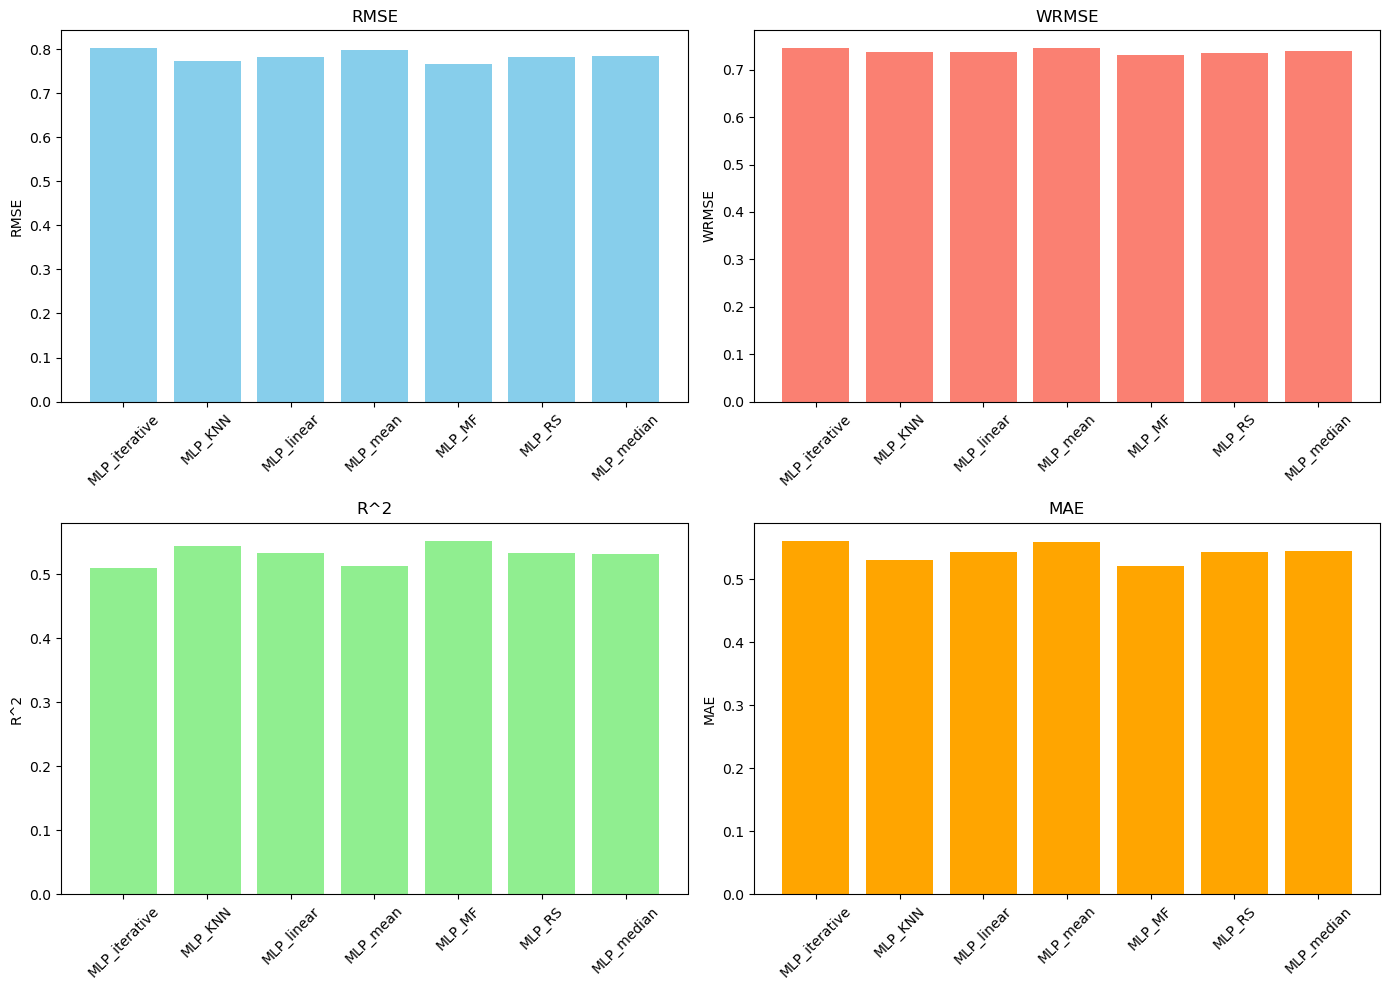

In [19]:
# 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# RMSE
axs[0, 0].bar(models, rmse_values, color='skyblue')
axs[0, 0].set_title('RMSE')
axs[0, 0].set_ylabel('RMSE')
axs[0, 0].tick_params(axis='x', rotation=45)

# WRMSE
axs[0, 1].bar(models, wrmse_values, color='salmon')
axs[0, 1].set_title('WRMSE')
axs[0, 1].set_ylabel('WRMSE')
axs[0, 1].tick_params(axis='x', rotation=45)

# R^2
axs[1, 0].bar(models, r2_values, color='lightgreen')
axs[1, 0].set_title('R^2')
axs[1, 0].set_ylabel('R^2')
axs[1, 0].tick_params(axis='x', rotation=45)

# MAE
axs[1, 1].bar(models, mae_values, color='orange')
axs[1, 1].set_title('MAE')
axs[1, 1].set_ylabel('MAE')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Confusion Matrix 시각화

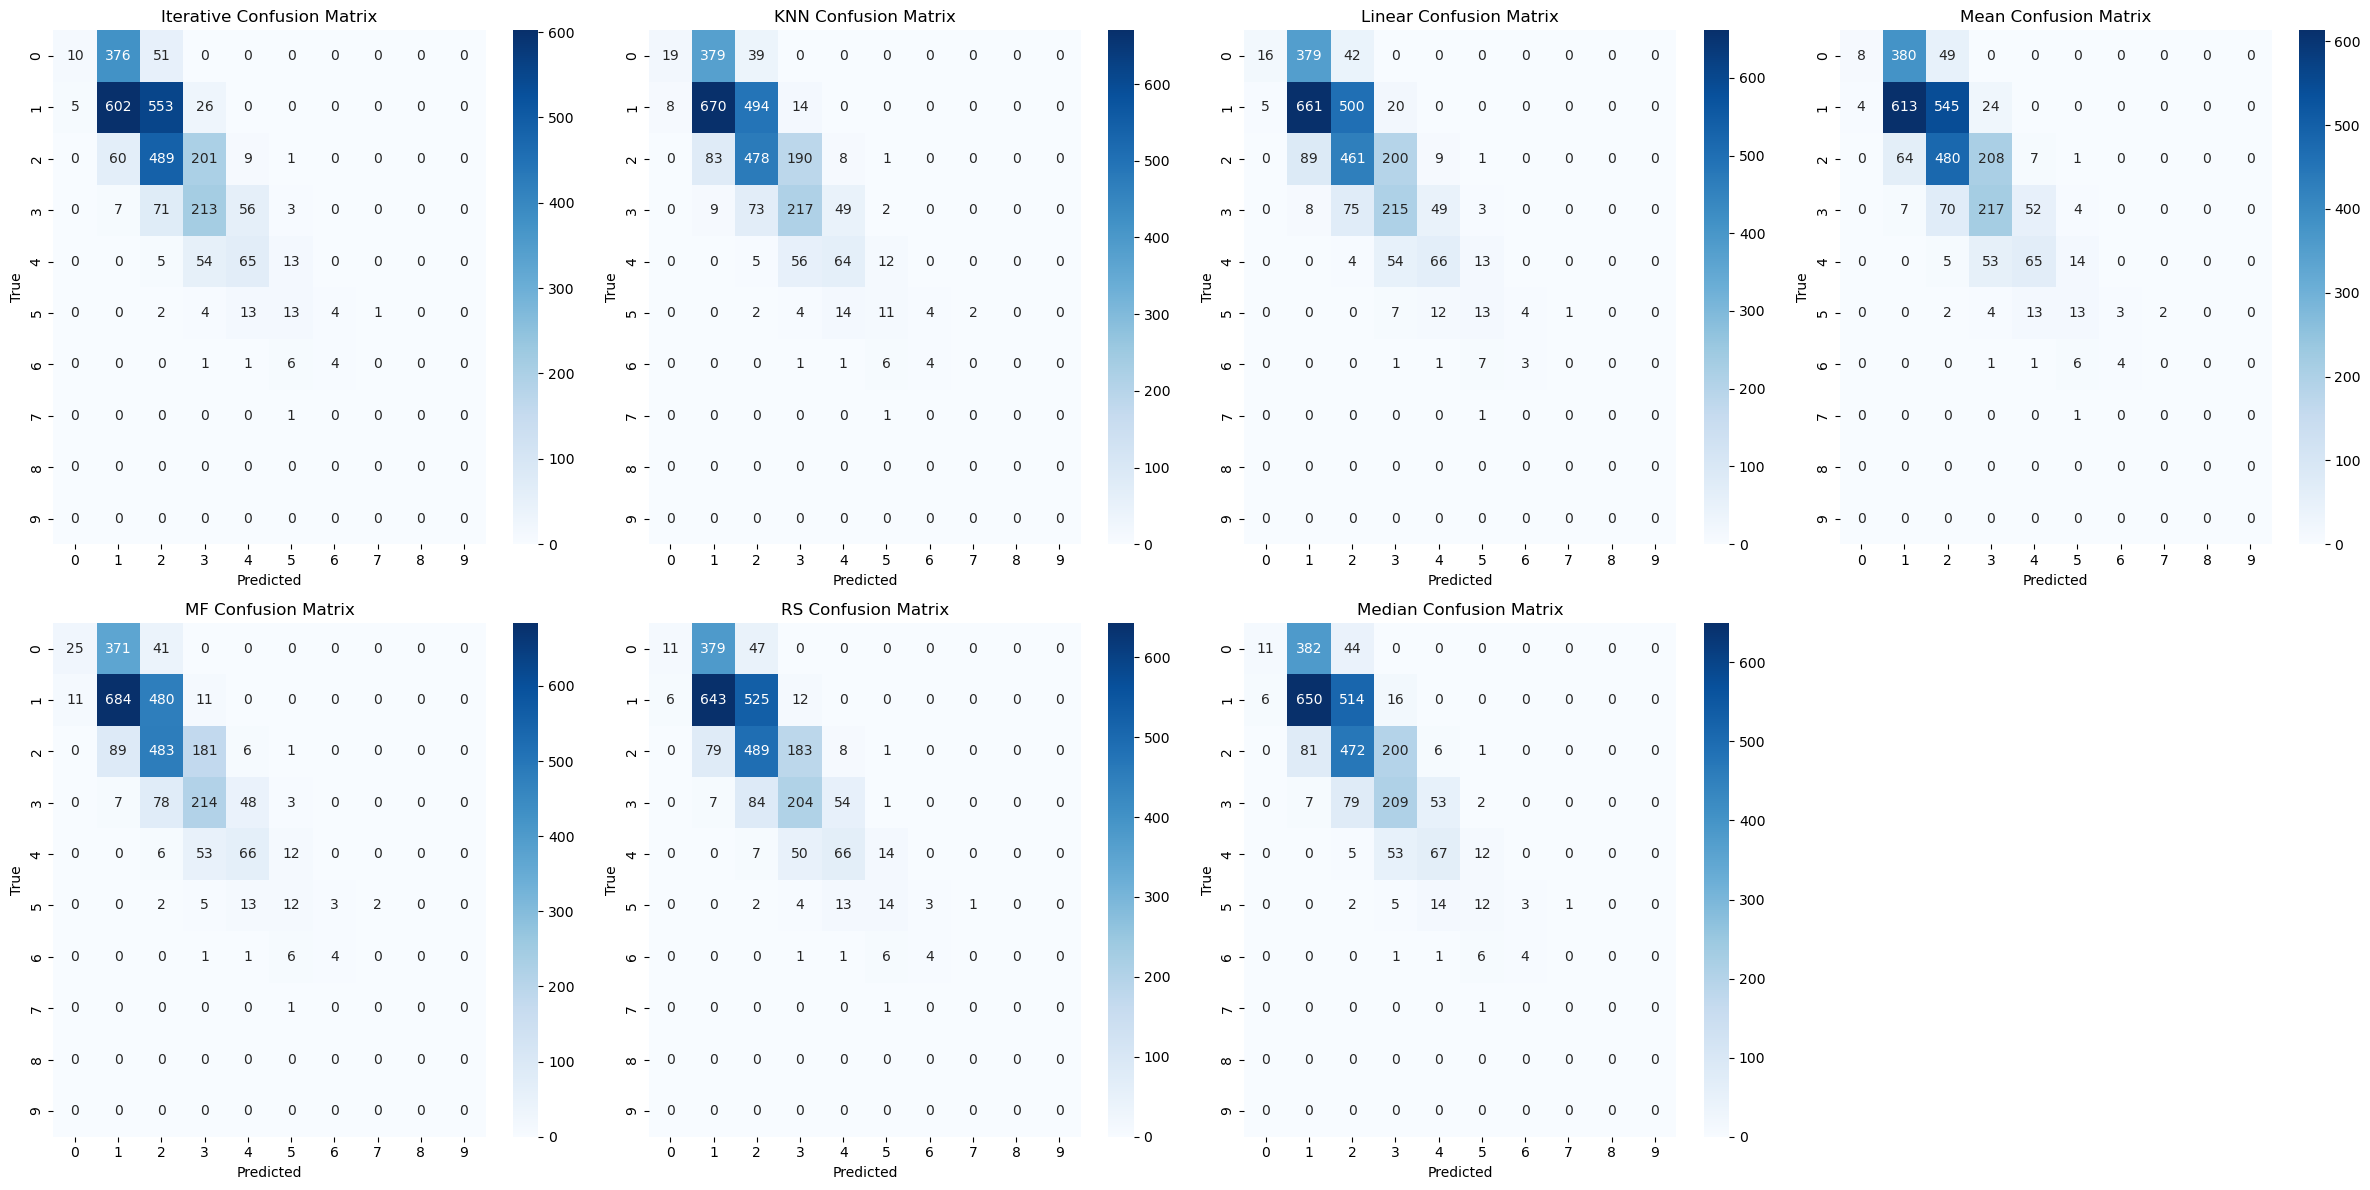

In [21]:

# 2x4 그리드로 서브플롯 설정
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# 각 서브플롯에 혼동 행렬 시각화
sns.heatmap(iterative_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[0, 0])
axes[0, 0].set_title('Iterative Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')

sns.heatmap(KNN_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[0, 1])
axes[0, 1].set_title('KNN Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')

sns.heatmap(linear_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[0, 2])
axes[0, 2].set_title('Linear Confusion Matrix')
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('True')

sns.heatmap(mean_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[0, 3])
axes[0, 3].set_title('Mean Confusion Matrix')
axes[0, 3].set_xlabel('Predicted')
axes[0, 3].set_ylabel('True')

sns.heatmap(MF_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[1, 0])
axes[1, 0].set_title('MF Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')

sns.heatmap(RS_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[1, 1])
axes[1, 1].set_title('RS Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')

# Median Confusion Matrix 추가
sns.heatmap(median_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10), ax=axes[1, 2])
axes[1, 2].set_title('Median Confusion Matrix')
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('True')

# 빈 서브플롯을 추가하여 그리드 균형 맞추기
fig.delaxes(axes[1, 3])  # 사용되지 않는 마지막 서브플롯 제거

# 레이아웃 조정
plt.tight_layout()
plt.show()